In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
sub = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

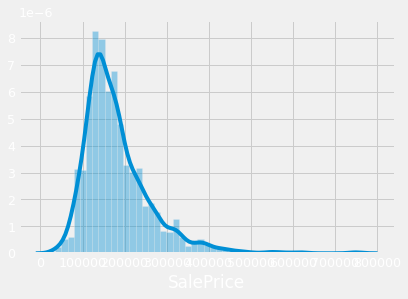

In [35]:
plt.style.use('fivethirtyeight')
sns.distplot(train['SalePrice'])

In [36]:
corr = train.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


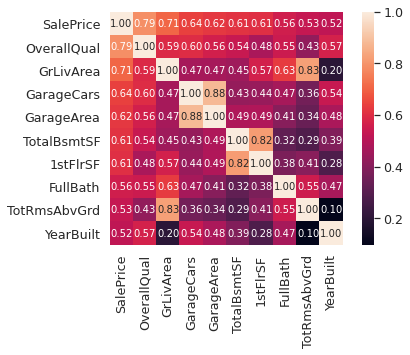

In [37]:
k = 10

cols = corr.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.15)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Heat Map Shows that OverallQual and GrLivArea are the most correlated to SalePrice

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


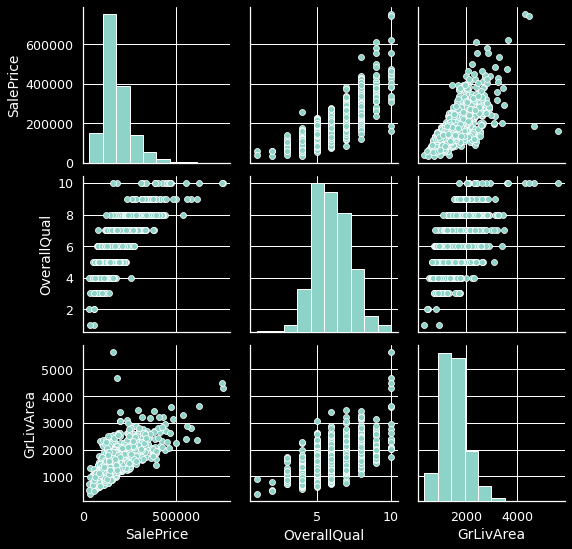

In [38]:
plt.style.use('dark_background')
cols = ['SalePrice','OverallQual','GrLivArea']
sns.pairplot(train[cols],size=2.5)

In [39]:
train.sort_values(by='GrLivArea',ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [40]:
# Deleting the top two data
train = train.drop(index = train[train['Id'] == 1299].index)
train = train.drop(index = train[train['Id'] == 524].index)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


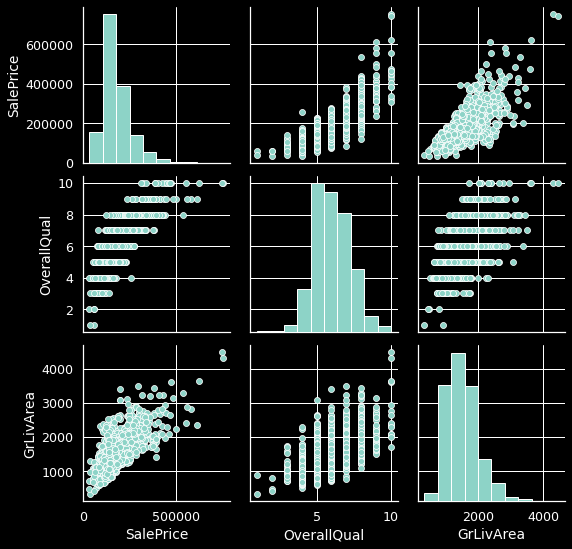

In [41]:
cols = ['SalePrice','OverallQual','GrLivArea']
sns.pairplot(train[cols],size=2.5)

In [42]:
train_x = train[["OverallQual", "GrLivArea"]]
train_y = train["SalePrice"]

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
ms_x = MinMaxScaler()
ms_y = MinMaxScaler()

In [45]:
train_y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [46]:
train_y = train_y.values.reshape(-1,1)
train_y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [47]:
train_x

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198
...,...,...
1455,6,1647
1456,6,2073
1457,7,2340
1458,5,1078


In [48]:
train_x = ms_x.fit_transform(train_x)
train_y = ms_y.fit_transform(train_y)

In [49]:
train_x

array([[0.66666667, 0.33220666],
       [0.55555556, 0.22404635],
       [0.66666667, 0.35055529],
       ...,
       [0.66666667, 0.4843071 ],
       [0.44444444, 0.17962337],
       [0.44444444, 0.22259778]])

In [50]:
train_y

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(train_x,train_y)

LinearRegression()

In [54]:
# partial regression coefficient
print('slope ： {0}'.format(lm.coef_))

# y-intercept
print('y-intercept : {0}'.format(lm.intercept_))


slope ： [[0.40106086 0.36687671]]
y-intercept : [-0.12840871]


In [55]:
lm_pred = lm.predict(train_x)
lm_pred

array([[0.26084409],
       [0.17660027],
       [0.26757577],
       ...,
       [0.31664619],
       [0.11574019],
       [0.1315065 ]])

In [56]:
from sklearn import metrics

In [60]:
print('MAE :', metrics.mean_absolute_error(train_y, lm_pred))
print('MSE :', metrics.mean_squared_error(train_y, lm_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(train_y, lm_pred)))

MAE : 0.039802379473265675
MSE : 0.0031466881350992147
RMSE : 0.05609534860484615


In [61]:
test_x = test[['OverallQual','GrLivArea']]
test_x

,OverallQual,GrLivArea
0,5,896
1,6,1329
2,5,1629
3,6,1604
4,8,1280
...,...,...
1454,4,1092
1455,4,1092
1456,5,1224
1457,5,970


In [63]:
test_x = ms_x.fit_transform(test_x)

In [64]:
test_pred = lm.predict(test_x)

In [65]:
test_pred = ms_y.inverse_transform(test_pred)
test_pred

array([[ 98347.33431213],
       [154837.97515546],
       [139654.87317166],
       ...,
       [116831.47175541],
       [102517.53605238],
       [224740.88646068]])

In [66]:
test["SalePrice"] = test_pred
test[["Id","SalePrice"]].head()

,Id,SalePrice
0,1461,98347.334312
1,1462,154837.975155
2,1463,139654.873172
3,1464,170335.346487
4,1465,216255.275865


In [ ]:
test[["Id","SalePrice"]].to_csv("./submission.csv",index=False)